In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
url = 'https://drive.google.com/file/d/1NLS6-YCjx9ck-E76rERyUWqnIF-uBfC2/view?usp=sharing'

In [4]:
dataset_url='https://drive.google.com/uc?id=' + url.split('/')[-2]

In [5]:
df = pd.read_csv(dataset_url)

In [6]:
# 4 Выявление пустых ячеек

<Axes: >

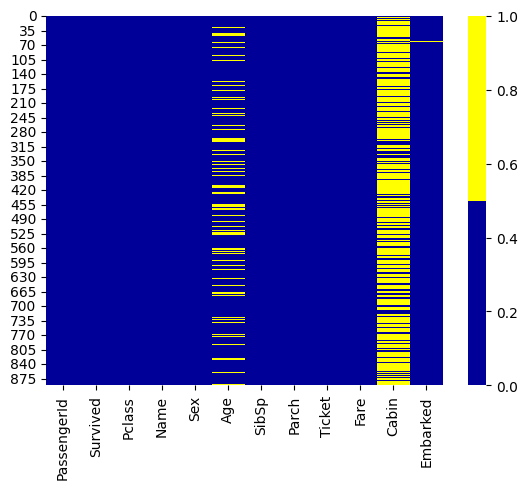

In [7]:
cols = df.columns[0:]
# визуализация пропущенных значений: желтый - пропущенные данные, синий - не пропущенные
colours = ['#000099', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [8]:
df.isnull().sum() # Количество пропущенных значений

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
# Процент пропущенных значений по каждой колонке
for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(perc_missing*100)))

PassengerId - 0%
Survived - 0%
Pclass - 0%
Name - 0%
Sex - 0%
Age - 20%
SibSp - 0%
Parch - 0%
Ticket - 0%
Fare - 0%
Cabin - 77%
Embarked - 0%


In [10]:
# 5 Замена или удаление пустых значений

In [11]:
# Для колонок Age применим замену пустых значений медианным значением, так как она устойчива к выбросам
# Для колонок Cabin применим замену пустых значений значением None
# Для колонок Embarked применим замену пустых значений модой
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Cabin'] = df['Cabin'].fillna('None')
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode())

In [12]:
# 7 Аналитика

In [13]:
# Здесь предсталены минимальные и максимальные значения по колонкам
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
# Здесь предсталены количество уникальных значений по колонкам
for col in df.columns:
    uniq_val = df[col].nunique()
    print('{} - {}'.format(col, uniq_val))

PassengerId - 891
Survived - 2
Pclass - 3
Name - 891
Sex - 2
Age - 88
SibSp - 7
Parch - 7
Ticket - 681
Fare - 248
Cabin - 148
Embarked - 3


In [15]:
# 8 Влияние признаков

<ipython-input-16-4cc9dc4b63c3>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr(method=coef_corr)


(7.5, -0.5)

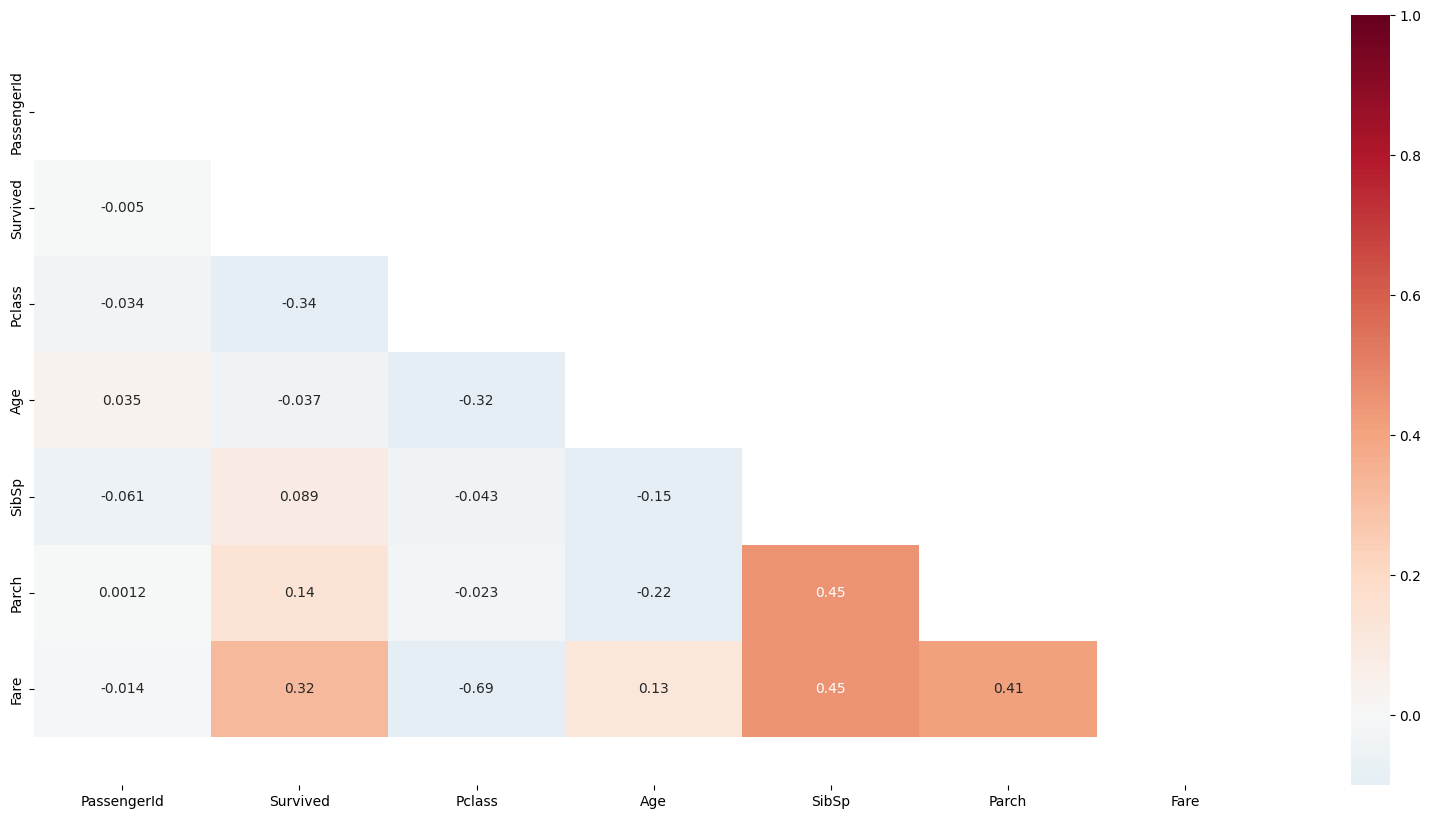

In [16]:
coef_corr = 'spearman'
plt.figure(figsize=(20,10))
c= df.corr(method=coef_corr)
matrix = np.triu(c)
ax = sns.heatmap(c,cmap='RdBu_r',annot=True, mask=matrix, vmin=-0.1, vmax=1, center= 0)

bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,None,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,None,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,None,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,None,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,None,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


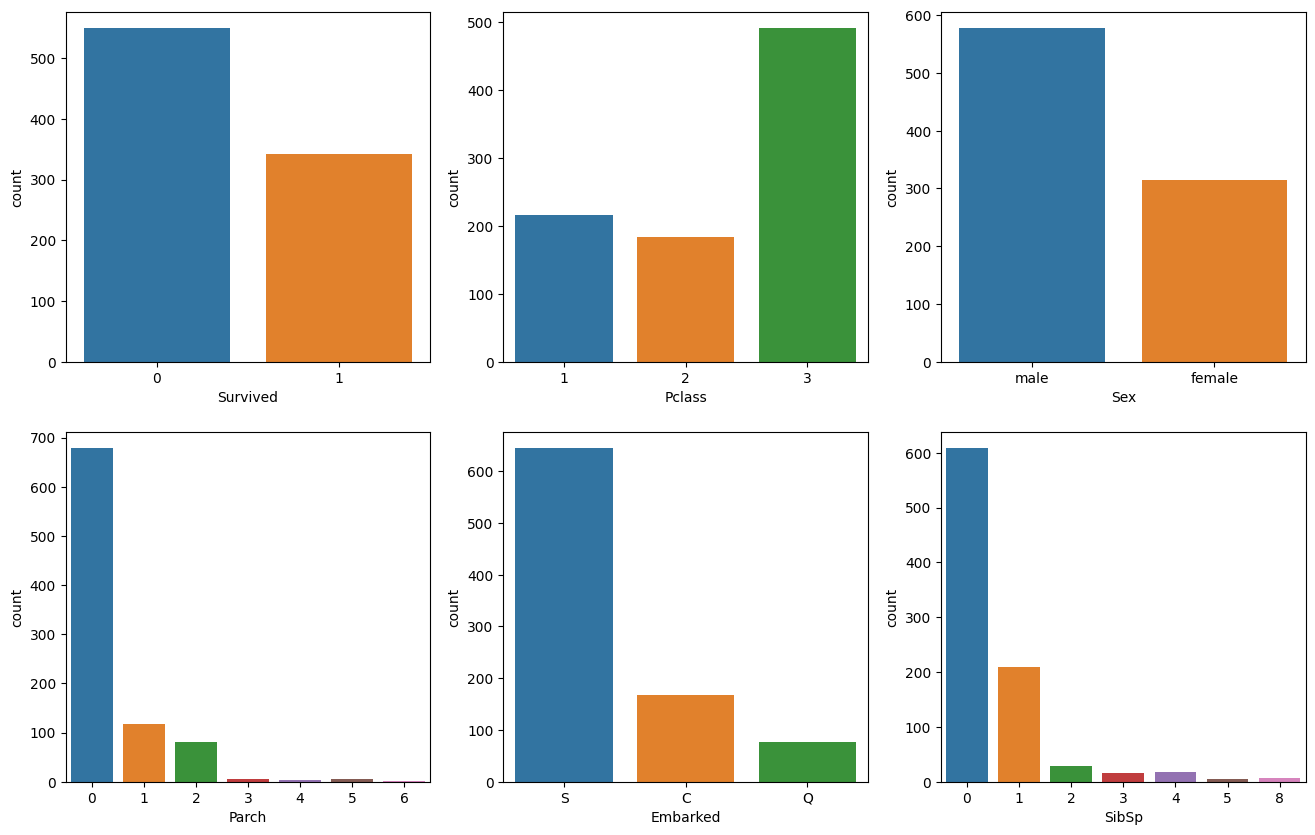

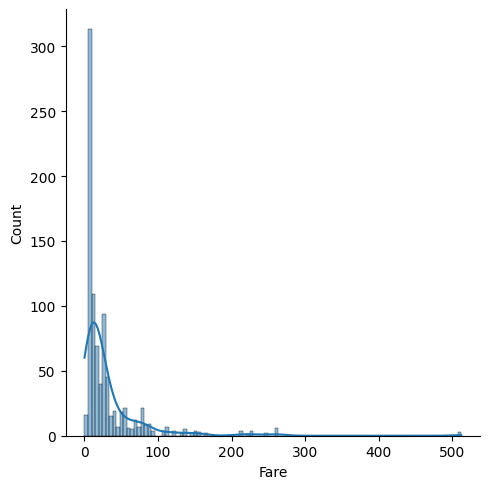

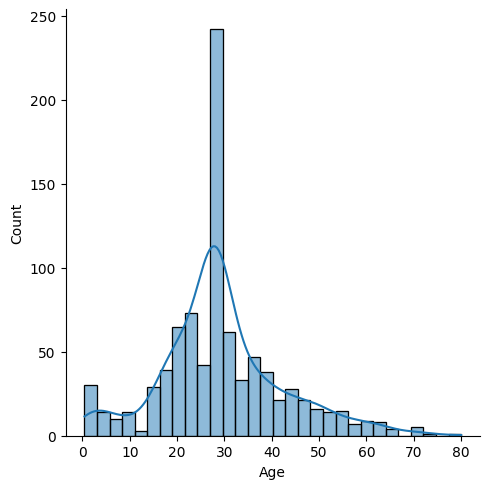

In [32]:
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
sns.countplot(x='Survived',data=df,ax=axes[0,0])
sns.countplot(x='Pclass',data=df,ax=axes[0,1])
sns.countplot(x='Sex',data=df,ax=axes[0,2])
sns.countplot(x='SibSp',data=df,ax=axes[1,2])
sns.countplot(x='Parch',data=df,ax=axes[1,0])
sns.countplot(x='Embarked',data=df,ax=axes[1,1])
sns.displot(x=df['Fare'], kde=True)
sns.displot(x=df['Age'],kde=True)

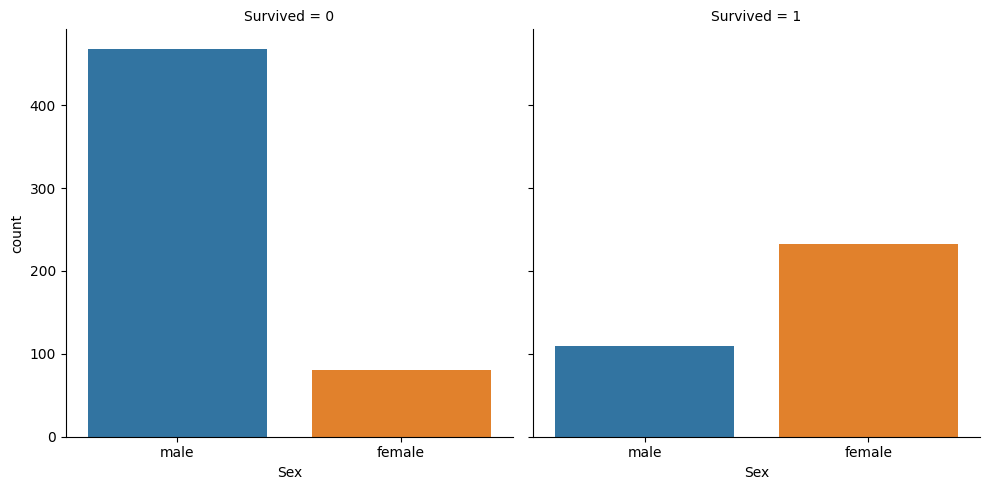

In [33]:
sns.catplot(x='Sex', col='Survived', kind='count', data=df)

In [34]:
print("Процент выживших женщин: " , df[df.Sex == 'female'].Survived.sum()/df[df.Sex == 'female'].Survived.count())
print("Процент выживших мужчин:   " , df[df.Sex == 'male'].Survived.sum()/df[df.Sex == 'male'].Survived.count())

Процент выживших женщин:  0.7420382165605095
Процент выживших мужчин:    0.18890814558058924


<Axes: xlabel='Pclass', ylabel='count'>

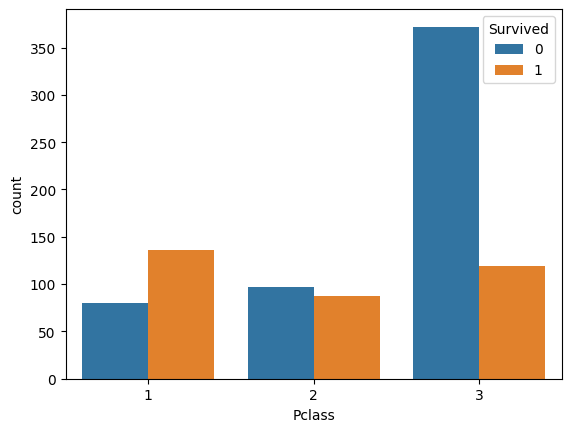

In [38]:
sns.countplot(x='Pclass', hue='Survived', data=df)

In [41]:
print("Процент выживших людей 1 классом намного выше, далее идет 2 класс, самый низкий процент у людей третьего класса")

Процент выживших людей 1 классом намного выше, далее идет 2 класс, самый низкий процент у людей третьего класса


<Axes: xlabel='Age', ylabel='Survived'>

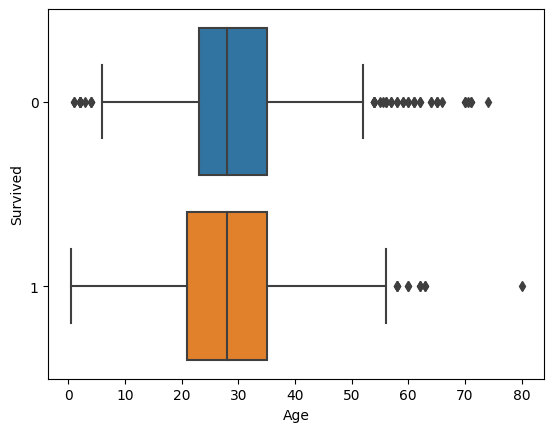

In [47]:
sns.boxplot(y = 'Survived', x = 'Age', data = df, orient = 'h')

In [48]:
print("Выжило больше детей и людей пожилого возраста")

Выжило больше детей и людей пожилого возраста
